Họ và tên: Nguyễn Minh Đăng

Mã số sinh viến: 20230022

# BÁO CÁO THỰC HÀNH VẬT LÝ HẠT NHÂN ĐẠI CƯƠNG

## SAI SỐ THỐNG KÊ TRONG THỰC NGHIỆM

## Câu hỏi lý thuyết
### Trình bày định nghĩa và nguồn gốc của sai số hệ thống:
Sai số hệ thống: là những sai số có nguồn gốc từ.

+ Sai lệch định cỡ của thiết bị đo so với giá trị được cho là chuẩn

+ Sai lệch trong bố trí thí nghiệm của người đo.

+ Các yếu tố, đều kiện tác động từ bên ngoài (nhiệt độ, các tín hiệu gây nhiễu, ...).

+ Sai số của các đại lượng tham khảo từ các mô hình tính toán hoặc đo đạc khác.


### Nêu một số ví dụ về sai số ngẫu nhiên thường gặp:
- Sự không ổn định khi đo phông môi trường.
- Sai của các lần đo đạc và vẽ biểu đồ trong thực hành vật lý cơ sở 1 và 2.

## Báo cáo kết quả

Nguồn phóng xạ: Ra-226

Thời gian đo: 100(s)

Thiết bị đo: Geiger-Counter

In [1]:
import pandas as pd
import numpy as np
import os
os.getcwd()

'c:\\Users\\minec\\PROJECTS\\Jupyter\\BT Thong Ke\\BT_TK_3'

In [2]:
data = pd.read_excel('data.xlsx')

### Bảng số liệu

In [3]:
display(data)

,Np,N
0,133,22306
1,108,22171
2,84,22095
3,124,22218
4,129,22164
5,125,22205
6,123,22110
7,90,22232
8,103,22202
9,94,22280


Gọi ${R}$ là tốc độ đếm thật, ta có:

\begin{align}
R(s^{-1}) = (N-N_P)/100
\end{align}

In [4]:
N = np.array(data[0:]['N'])/100
Np = np.array(data[0:]['Np'])/100
R = (N-Np)
STT = np.linspace(1, len(R), len(R), dtype=int)

### Ta có bảng số liệu mới

In [5]:
df = {'$N(s^{-1})$': N, '$N_p(s^{-1})$': Np, '$R(s^{-1})$': R}
display(pd.DataFrame(df))

,$N(s^{-1})$,$N_p(s^{-1})$,$R(s^{-1})$
0,223.06,1.33,221.73
1,221.71,1.08,220.63
2,220.95,0.84,220.11
3,222.18,1.24,220.94
4,221.64,1.29,220.35
5,222.05,1.25,220.80
6,221.10,1.23,219.87
7,222.32,0.90,221.42
8,222.02,1.03,220.99
9,222.80,0.94,221.86


##### Hàm display bị lỗi chèn công thức là bị lỗi

### Tính sai số
Ta có sai số thống kê mẫu:
\begin{align}
\Delta x = \frac{S_x}{\sqrt n}
\end{align}
- ${S_x}$ là độ lệch chuẩn mẫu

Với số liệu trên ta có:
\begin{align}
\Delta R\, (s^{-1}) = ( \Delta N + \Delta Np ) / 100
\end{align}

### Tính sai số

In [6]:
import statistics as stt

erN = stt.variance(N)/np.sqrt(len(N))
erNp = stt.variance(Np)/np.sqrt(len(Np))
erR = (erN + erNp)

mean_N = stt.mean(N)
mean_R = stt.mean(R)

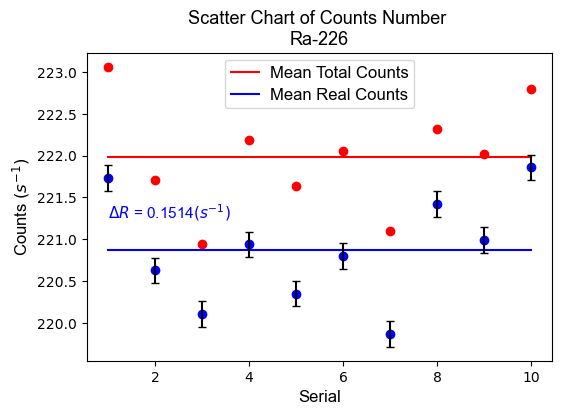

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))

## Scatter Chart
plt.scatter(STT, N , color='red')
plt.scatter(STT, R , color='blue')

# plot chart
plt.plot([min(STT), max(STT)], [mean_N , mean_N ], color='red', label='Mean Total Counts')
plt.plot([min(STT), max(STT)], [mean_R , mean_R ], color='blue', label='Mean Real Counts')

plt.errorbar(STT, R, yerr=erR, linestyle='none', color='black', capsize=3)

# Text
L = plt.legend()
plt.setp(L.texts, fontsize=12, family='arial')
plt.title('Scatter Chart of Counts Number \nRa-226', fontsize=13, fontname='arial')
plt.xlabel('Serial', fontsize=12, fontname='arial')
plt.ylabel('Counts $(s^{-1})$', fontsize=12, fontname='arial')

plt.text(1, 221.25, r'$\Delta R$ = ' + str(round(erR,4)) + r'$(s^{-1})$', color='blue', fontsize=11, fontname='arial')

plt.savefig('pnp', dpi=300)